In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi, sqrt

In [78]:
"""
Y, X = np.mgrid[-5:5:100j, -2*np.pi:2*np.pi:100j]
U = Y
V = - np.sin(X)

strm=plt.streamplot( X, Y, U, V, color=np.sqrt(U*U+V*V), linewidth=2, cmap='jet')
cbar=plt.colorbar(strm.lines)

plt.xlabel('X')
plt.ylabel('Y')
cbar.set_label('speed', rotation=270)

plt.show()
"""

"\nY, X = np.mgrid[-5:5:100j, -2*np.pi:2*np.pi:100j]\nU = Y\nV = - np.sin(X)\n\nstrm=plt.streamplot( X, Y, U, V, color=np.sqrt(U*U+V*V), linewidth=2, cmap='jet')\ncbar=plt.colorbar(strm.lines)\n\nplt.xlabel('X')\nplt.ylabel('Y')\ncbar.set_label('speed', rotation=270)\n\nplt.show()\n"

In [116]:
n = 100
xsz=2.0
ysz=2.0
x = np.linspace(-xsz, xsz, n)
y = np.linspace(-ysz, ysz, n)
X, Y = np.meshgrid(x, y)

#ax = plt.axes()

u=1.0
R=1.0
uxy = np.zeros((n, n))
for i in range(1, n, 1):
    for j in range(1, n, 1):
        rcir=sqrt(x[i]**2.0+y[j]**2.0)
        if rcir < R :
            uxy[i][j]=0.0
        else:
            uxy[i][j]=u
        if j==n:
            break
    if i==n:
        break

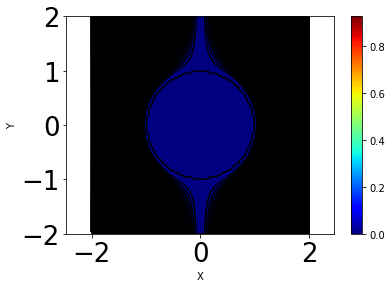

In [139]:
#c = patches.Circle(xy=(0, 0), radius=R, fc='g', ec='r')
#ax.add_patch(c)

vxvec = np.zeros((n, n))
vyvec = np.zeros((n, n))
speed = np.zeros((n, n))
ptn = np.zeros((n, n))
for i in range(1, n, 1):
    for j in range(1, n, 1):
        vxvec[i][j]=(x[i]/sqrt(x[i]**2.0+y[j]**2.0)*uxy[i][j]*x[i]/sqrt(x[i]**2.0+y[j]**2.0)*(1.0-1.5*R/sqrt(x[i]**2.0+y[j]**2.0)+0.5*R**3.0/sqrt(x[i]**2.0+y[j]**2.0)**3.0)-y[j]/sqrt(x[i]**2.0+y[j]**2.0)*(-uxy[i][j])*y[j]/sqrt(x[i]**2.0+y[j]**2.0)*(1.0-0.75*R/sqrt(x[i]**2.0+y[j]**2.0)-0.25*R**3.0/sqrt(x[i]**2.0+y[j]**2.0)**3.0))
        vyvec[i][j]=(y[j]/sqrt(x[i]**2.0+y[j]**2.0)*uxy[i][j]*x[i]/sqrt(x[i]**2.0+y[j]**2.0)*(1.0-1.5*R/sqrt(x[i]**2.0+y[j]**2.0)+0.5*R**3.0/sqrt(x[i]**2.0+y[j]**2.0)**3.0)+x[i]/sqrt(x[i]**2.0+y[j]**2.0)*(-uxy[i][j])*y[j]/sqrt(x[i]**2.0+y[j]**2.0)*(1.0-0.75*R/sqrt(x[i]**2.0+y[j]**2.0)-0.25*R**3.0/sqrt(x[i]**2.0+y[j]**2.0)**3.0))
        speed[i][j]=sqrt(vxvec[i][j]**2.0+vyvec[i][j]**2.0)
        ptn[i][j]=0.5*uxy[i][j]*(sqrt(x[i]**2.0+y[j]**2.0)-R)**2.0*(1.0+0.5*R/sqrt(x[i]**2.0+y[j]**2.0))*(y[j]**2.0/(x[i]**2.0+y[j]**2.0))
        #-0.75*R*uxy[i][j]*sqrt(x[i]**2.0+y[j]**2.0)*(1.0-1.0/3.0*(R**2.0/(x[i]**2.0+y[j]**2.0)))*(y[j]**2.0/(x[i]**2.0+y[j]**2.0))
#x0 = np.zeros(n)
#x0 =  [-xsz  for i in range(n)]
#ax.set_aspect('equal')
#seed_points = np.array([x0, y])
#stream_points = np.array(zip(np.arange(-xsz+0.5,xsz-0.5,.5), -np.arange(-ysz+0.5,ysz-0.5,.5)))
plt.figure(1)
#plt.streamplot(X, Y, vxvec, vyvec, density=1, linewidth=0.2,cmap='jet',minlength=0.00001,maxlength = 1.0,integration_direction='forward')#, start_points=stream_points)#,start_points = seed_points.T)
#plt.quiver(X[::2,::2], Y[::2,::2], vxvec[::2,::2], vyvec[::2,::2],scale=1 ,scale_units='xy',width=0.0035)
plt.pcolormesh(X, Y, ptn,cmap='jet')
plt.tick_params(labelsize=26)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.contour(X, Y, ptn,1000,colors='black')
plt.axis('equal')
plt.xlabel('X') 
plt.ylabel('Y')
plt.xlim(-xsz, xsz)
plt.ylim(-ysz, ysz)
plt.show()